## Filter Data



In [ ]:
import cecil
import xarray

True

First, set up the Cecil client.

In [2]:
client = cecil.Client()

Load the dataset of interest.

In [3]:
data_request_id = '1dd55fdb-fbab-4943-a984-4d327baf4356'

# Load the xarray dataset for the specified data request
ds = client.load_xarray(data_request_id)
ds

<xarray.Dataset> Size: 188MB
Dimensions:           (x: 5394, y: 4351, time: 8)
Coordinates:
  * x                 (x) float64 43kB -1.779e+07 -1.779e+07 ... -1.773e+07
  * y                 (y) float64 35kB 2.541e+06 2.541e+06 ... 2.494e+06
    spatial_ref       int64 8B 0
  * time              (time) datetime64[ns] 64B 2017-01-01 ... 2024-01-01
Data variables:
    land_cover_class  (time, y, x) uint8 188MB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
Attributes:
    provider_name:    io
    dataset_id:       a4bb9aea-b6df-4d19-9083-38357f8fa76c
    dataset_name:     Land cover 10 m 9-class
    dataset_crs:      EPSG:3857
    aoi_id:           d9532dde-cf4d-49f8-9b93-94c6d4a60618
    data_request_id:  1dd55fdb-fbab-4943-a984-4d327baf4356

Plotting this dataset directly shows that there is an area of NoData surrounding the AOI.

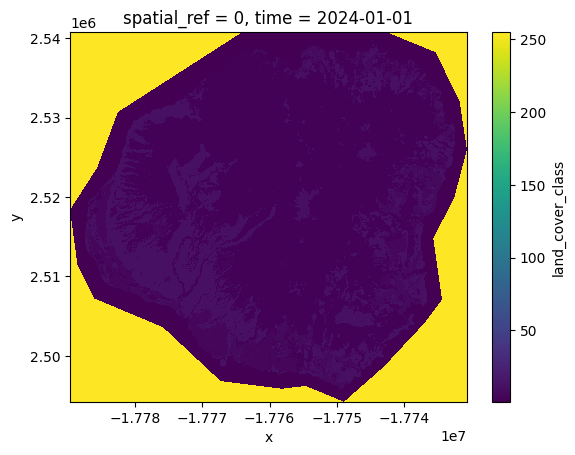

In [4]:
ds['land_cover_class'].sel(time='2024').plot()

This NoData area can be filtered out by accessing the NoData value from the '_FillValue' attribute and then filtering any pixels with this value.

In [5]:
nodata_value = ds['land_cover_class']._FillValue
print(f"NoData value: {nodata_value}")

NoData value: 255


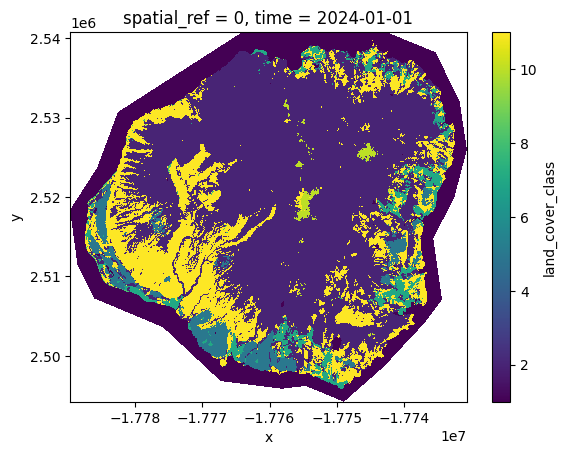

In [6]:
filtered_ds = ds['land_cover_class'].where(ds['land_cover_class'] != nodata_value)
filtered_ds.sel(time='2024').plot()